In [8]:
import pandas as pd


In [9]:
Data_Set1 = pd.read_csv("./Data_Set.csv")
Data_test = pd.read_csv("./Data_Set_Test.csv")
Data_Set2 = pd.read_csv("./Data_Set.csv", header=2)
# change title column
Data_Set3 = Data_Set2.rename(columns={'Temperature': "Temp"})
# drop column
Data_Set4 = Data_Set3.drop("No. Occupants", axis=1)
# drop column
Data_Set3.drop("No. Occupants", axis=1, inplace=True)

Data_Set5 = Data_Set4.drop(2,  axis=0)

Data_Set6 = Data_Set5.reset_index(drop=True)

Data_Set6.describe()

Min_item = Data_Set6['E_Heat'].min()

Data_Set6['E_Heat'][Data_Set6['E_Heat'] == Min_item]

Data_Set6['E_Heat'].replace(-4, 21, inplace=True)




# Covariance


<AxesSubplot:>

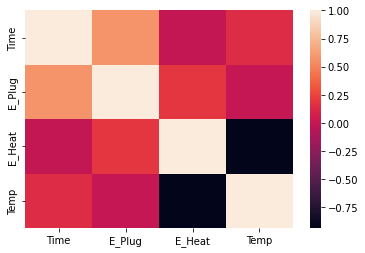

In [10]:
Data_Set6.cov()

import seaborn as sn

sn.heatmap(Data_Set6.corr())

# Missing Values

In [11]:
Data_Set6.info()

import numpy as np
Data_Set7 = Data_Set6.replace('!', np.NaN)
Data_Set7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   24 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   23 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [12]:
Data_Set7 = Data_Set7.apply(pd.to_numeric)

Data_Set7.isnull()

,Time,E_Plug,E_Heat,Price,Temp
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [13]:
Data_Set7.drop(13, axis=0, inplace=True)

Data_Set7.dropna(axis=0, inplace=True)

Data_Set8 = Data_Set7.fillna(method= 'ffill')

In [14]:
from sklearn.impute import SimpleImputer

M_Var = SimpleImputer(missing_values=np.nan, strategy="mean")
M_Var.fit(Data_Set7)
Data_Set9 = M_Var.transform(Data_Set7)